In [14]:
from benchmark.util import UniUtil

lines = [""]
for i in range(32, 2**16):
    content = (UniUtil.chr(i).encode("utf-8").rjust(4) + " => " + str(i).ljust(7)).ljust(4+4+7)
    if len(lines[-1]) + len(content) <= 120:
        lines[-1] += content
    else:
        lines[-1] += "\n"
        lines.append(content)



file = open("docs/chars.txt", "w")
file.write(reduce(lambda p,c: p+c, lines, ""))
file.close()

In [ ]:
from benchmark.convert import Converter

c = Converter()
re = c.prog(u"\\$(import|supports|media|font-face|page|-ms-viewport|keyframes|-webkit-keyframes|-moz-document)")
print re
infa = re.toInvariantNFA("nfaPD")
infa.display()
# print infa.witness()

# FAdo Witness
Implementation: a word in the first non-empty cross-section of length > 0  
Expectation: the first non-empty word in radix order

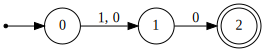

10


In [3]:
from FAdo.reex import str2regexp

re = str2regexp("((0 + 1) 0)")
nfa = re.nfaPD()
nfa.display()
print nfa.witness()

In [ ]:
from FAdo.reex import str2regexp

re = str2regexp("((0 + 1) 0)")
nfa = re.nfaPD()
l = len(nfa.witness())
print [nfa.enumNFA(l)]